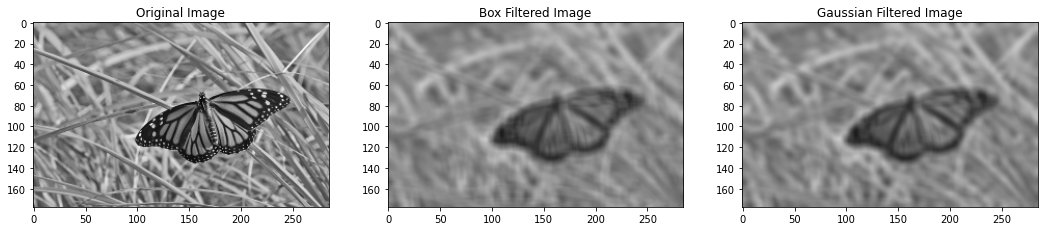

In [1]:
#Question 1
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread("butterfly.jpg", cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

k_size = 9
sigma = 4
box_kernel = 1./81*np.ones((9,9))
im_avg = cv.filter2D(im, -1, box_kernel)
im_gaussian = cv.GaussianBlur(im, (k_size, k_size), sigma)

fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(im, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(im_avg, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Box Filtered Image')
ax[2].imshow(im_gaussian, cmap='gray',vmin=0,vmax=255)
ax[2].set_title('Gaussian Filtered Image')
plt.show()

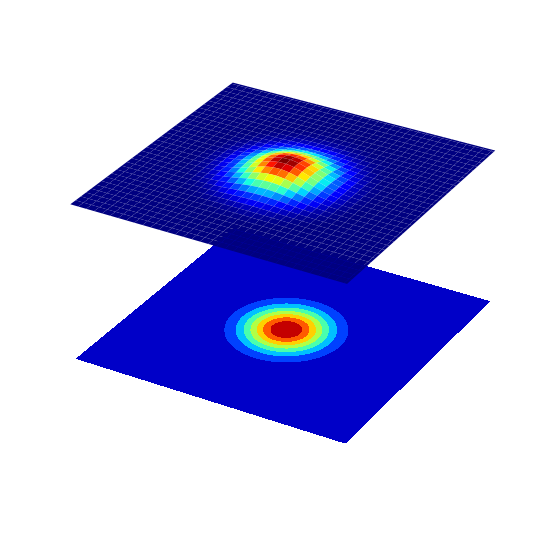

In [2]:
#Question 2
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1

X = np.arange(-5, 5.1, 0.1)
Y = np.arange(-5, 5.1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = 1/(2*np.pi*sigma**2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
cset = ax.contourf(X,Y,Z,zdir='z',offset=np.min(Z)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(Z)-2, np.max(Z))
plt.axis('off')
plt.show()

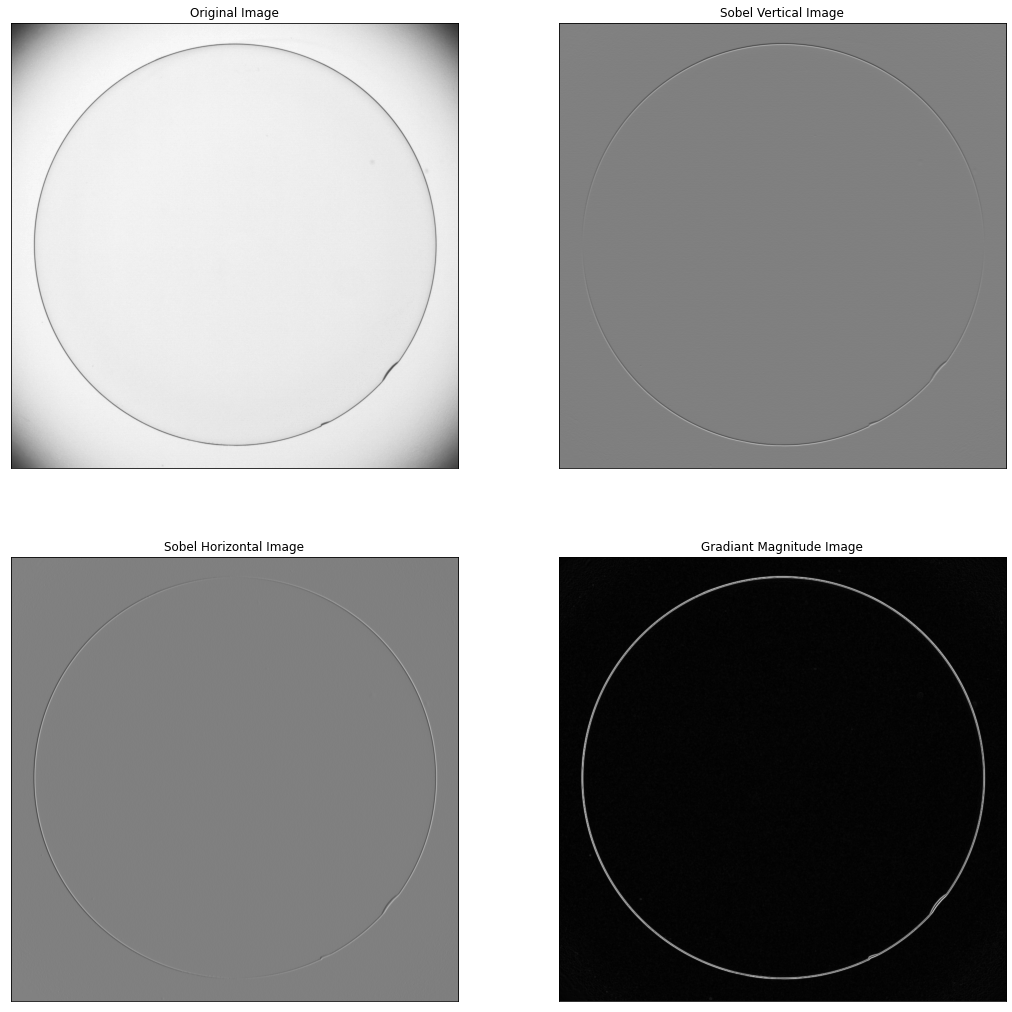

In [3]:
#Question 3
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread("contact_lens.TIF", cv.IMREAD_GRAYSCALE).astype(np.float32)
sobel_v = np.array([(-1,-2,-1), (0,0,0), (1,2,1)], dtype='float')
sobel_h = np.array([(-1,0,1), (-2,0,2), (-1,0,1)], dtype='float')

imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)
grad_mag = np.sqrt(imv**2+imh**2)

fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(18,18))
axes[0,0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0,0].set_title('Original Image')
axes[0,0].set_xticks([]),axes[0,0].set_yticks([])
axes[0,1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[0,1].set_title('Sobel Vertical Image')
axes[0,1].set_xticks([]),axes[0,1].set_yticks([])
axes[1,0].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[1,0].set_title('Sobel Horizontal Image')
axes[1,0].set_xticks([]),axes[1,0].set_yticks([])
axes[1,1].imshow(grad_mag, cmap='gray')
axes[1,1].set_title('Gradiant Magnitude Image')
axes[1,1].set_xticks([]),axes[1,1].set_yticks([])
plt.show()

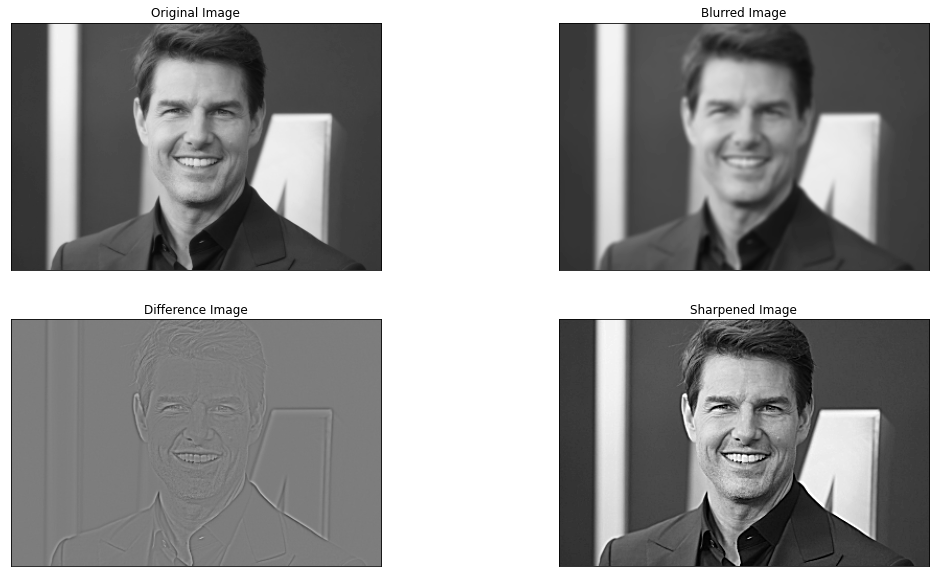

In [4]:
#Question 4
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("tom.jpg", cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff = img.astype('float32') - blurred.astype('float32')
sharpened = cv.addWeighted(img.astype('float32'), 1.0, diff, 1.5, 0)

fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(18,10))
axes[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0,0].set_title('Original Image')
axes[0,0].set_xticks([]),axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray', vmin=0, vmax=255)
axes[0,1].set_title('Blurred Image')
axes[0,1].set_xticks([]),axes[0,1].set_yticks([])
axes[1,0].imshow(diff+125, cmap='gray', vmin=0, vmax=255)
axes[1,0].set_title('Difference Image')
axes[1,0].set_xticks([]),axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray', vmin=0, vmax=255)
axes[1,1].set_title('Sharpened Image')
axes[1,1].set_xticks([]),axes[1,1].set_yticks([])
plt.show()